# Problem statement:
With the iris dataset we need to cluster iris flowers into certain groups.

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [28]:
data=pd.read_csv("Iris.csv")

In [29]:
data

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,target
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,2
146,146,6.3,2.5,5.0,1.9,2
147,147,6.5,3.0,5.2,2.0,2
148,148,6.2,3.4,5.4,2.3,2


In [30]:
data.drop("Unnamed: 0", axis=1, inplace=True)
data

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
data.shape

(150, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [7]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
target            int64
dtype: object

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [9]:
data.target.unique()

array([0, 1, 2], dtype=int64)

<Axes: xlabel='petal_length', ylabel='petal_width'>

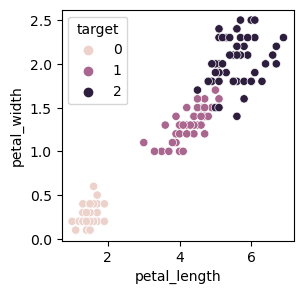

In [10]:
#EDA
plt.figure(figsize=(3,3))
sns.scatterplot(data=data, x="petal_length",y = "petal_width",hue='target')

In [11]:
#Data preprocessing
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [31]:
#duplictes
data.duplicated().sum()

3

In [6]:
data.shape

(150, 5)

In [32]:
data.drop_duplicates(keep=False,inplace=True)

In [8]:
data.shape

(145, 5)

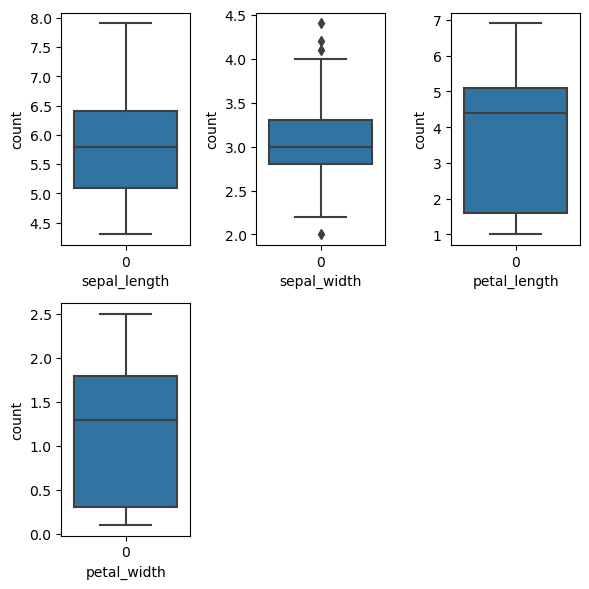

In [16]:
#Check for outliers
plt.figure(figsize=(6,6))
plotnumber=1

for column in data.drop("target",axis=1):
    if plotnumber<=4:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column)
        plt.ylabel("count")
    plotnumber+=1
plt.tight_layout()
    

<Axes: xlabel='sepal_width', ylabel='Count'>

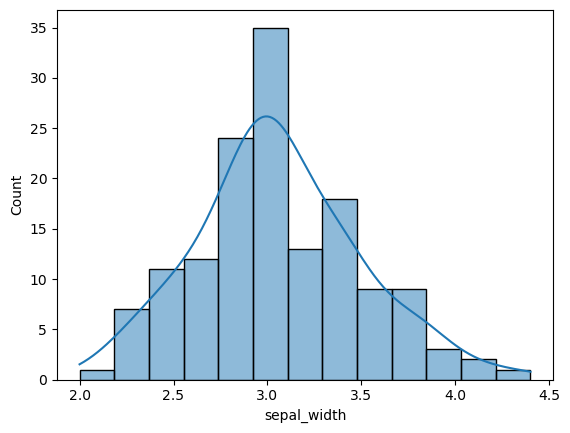

In [17]:
sns.histplot(data=data, x="sepal_width",kde=True)

#Clearly we see the outliers in sepal_width and normally distributed.
we use 3-sigma rule to identify the outliers.
#Replace outliers with mean since data is normal.

In [9]:
#3-sigma rule
low_limit=data["sepal_width"].mean()-3*data["sepal_width"].std()
upper_limit=data["sepal_width"].mean()+3*data["sepal_width"].std()
print("lower limit",low_limit)
print("upper limit",upper_limit)

lower limit 1.7408941303314172
upper limit 4.3749679386341


In [10]:
data.loc[data["sepal_width"]<low_limit]

,sepal_length,sepal_width,petal_length,petal_width,target


In [11]:
data.loc[data["sepal_width"]>upper_limit]

,sepal_length,sepal_width,petal_length,petal_width,target
15,5.7,4.4,1.5,0.4,0


In [12]:
data.loc[data["sepal_width"]>upper_limit,"sepal_width"]=data["sepal_width"].mean()

<Axes: xlabel='sepal_width'>

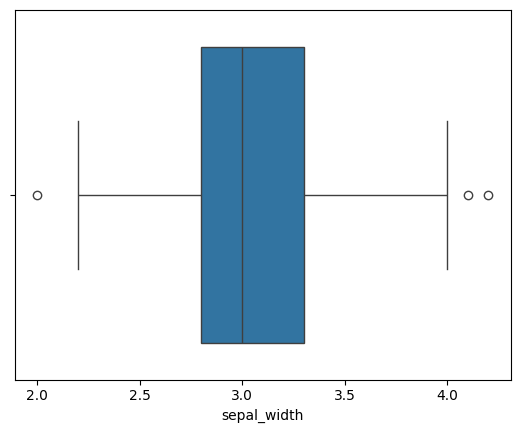

In [13]:
sns.boxplot(data=data, x="sepal_width")

In [14]:
#Apply Scaling
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
data[["sepal_length","sepal_width","petal_length","petal_width"]]=scaling.fit_transform(data[["sepal_length","sepal_width","petal_length","petal_width"]])

In [24]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,-0.921916,1.067062,-1.362741,-1.344133,0
1,-1.163429,-0.115083,-1.362741,-1.344133,0
2,-1.404943,0.357775,-1.419833,-1.344133,0
3,-1.525700,0.121346,-1.305648,-1.344133,0
4,-1.042672,1.303491,-1.362741,-1.344133,0


In [25]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'], dtype='object')

In [33]:
#Remove the target from data
x=data.drop("target",axis=1)

In [34]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


0
# Apply kmean model

In [49]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=6,random_state=42)
kmeans.fit(x)
   

KMeans(n_clusters=6, random_state=42)

In [50]:
kmeans.cluster_centers_

array([[6.23333333, 2.86944444, 4.70277778, 1.55      ],
       [5.25555556, 3.67037037, 1.5037037 , 0.28888889],
       [5.508     , 2.6       , 3.908     , 1.204     ],
       [4.685     , 3.125     , 1.405     , 0.205     ],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [6.512     , 3.04      , 5.512     , 2.132     ]])

In [51]:
kmeans.labels_

array([1, 3, 3, 3, 1, 1, 3, 1, 3, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 3, 3, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 3, 1, 1, 3, 3, 1, 1, 3, 1,
       3, 1, 3, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 0, 2, 2, 5, 4, 5, 5, 4, 2, 4, 5, 4, 5, 5, 5, 0,
       5, 5, 5, 4, 4, 0, 5, 0, 4, 0, 5, 4, 0, 0, 5, 4, 4, 4, 5, 0, 5, 4,
       5, 5, 0, 5, 5, 5, 5, 5, 5, 0, 5, 5, 0])

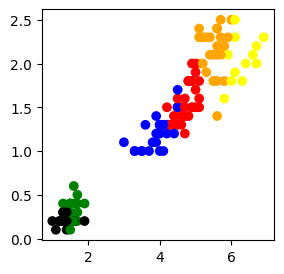

In [52]:
#visualize the clusters created by model
plt.figure(figsize=(3,3))
color_schema=np.array(["red","green","blue","black","yellow","orange"])
plt.scatter(x.petal_length,x.petal_width,color=color_schema[kmeans.labels_])

In [53]:
data["labels"]=pd.DataFrame(kmeans.labels_)

In [54]:
data

,sepal_length,sepal_width,petal_length,petal_width,target,labels
0,5.1,3.5,1.4,0.2,0,1.0
1,4.9,3.0,1.4,0.2,0,3.0
2,4.7,3.2,1.3,0.2,0,3.0
3,4.6,3.1,1.5,0.2,0,3.0
4,5.0,3.6,1.4,0.2,0,1.0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,NaN
146,6.3,2.5,5.0,1.9,2,NaN
147,6.5,3.0,5.2,2.0,2,NaN
148,6.2,3.4,5.4,2.3,2,NaN


In [55]:
new_point=[[3.4,5.6,2.4,0.8]] # A new observation where it will go 
#means which cluster
kmeans.predict(new_point)

array([1])

# Elbow Technique

Elbow method is the most popular method that is used to determine the optimal value of k.

How it works?

Start with some K.

Calculate WCSS (Within Cluster Sum of squared errors) ie., for each of the cluster, it calculate the distance of individual data points from the centroid, then square it and sum it up. WCSS = WCSS1 + WCSS2 + ..... WCSSk

Take new value for K, repeat step2.

For each number of K, WCSS is calculated.

Find the elbow point. That is the optimal value of K.

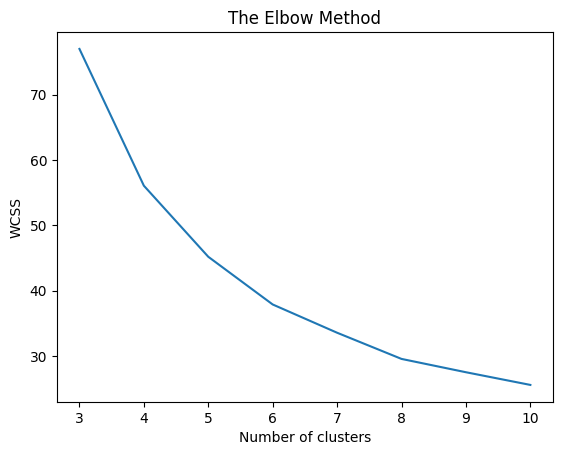

In [56]:
#Elbow method
from sklearn.cluster import KMeans
wcss=[]
for i in range (3,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(3,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Evaluation Metrics

In [57]:
from sklearn.metrics import silhouette_score
score=silhouette_score(x,kmeans.labels_)
score

0.31518042688383596